# Let's Begin

In [1]:
#this project is about if the people who took the loan repayed it or not.
#if target column = 1 (repaid)
#if target column = 0 (not repaid)

In [2]:
# Data

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# train.csv
# It contains training data for customers along with premium payment status (target)
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
# Variable	--Definition
# id	Unique ID of the policy
# perc_premium_paid_by_cash_credit	Percentage of premium amount paid by cash or credit card
# age_in_days	Age in days of policy holder
# Income	Monthly Income of policy holder
# Count_3-6_months_late	No of premiums late by 3 to 6 months
# Count_6-12_months_late	No  of premiums late by 6 to 12 months
# Count_more_than_12_months_late	No of premiums late by more than 12 months
# application_underwriting_score	Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)
# no_of_premiums_paid	Total premiums paid on time till now
# sourcing_channel	Sourcing channel for application
# residence_area_type	Area type of Residence (Urban/Rural)
# target	1 - premium paid on time, 0 - otherwise

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# test.csv
# Test file contains policies for which participants need to submit the probability of premium being paid on time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Variable	Definition
# id	Unique ID of the policy
# perc_premium_paid_by_cash_credit	Percentage of premium amount paid by cash or credit card
# age_in_days	Age in days of policy holder
# Income	Monthly Income of policy holder
# Count_3-6_months_late	No of premiums late by 3 to 6 months
# Count_6-12_months_late	No  of premiums late by 6 to 12 months
# Count_more_than_12_months_late	No of premiums late by more than 12 months
# application_underwriting_score	Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)
# no_of_premiums_paid	Total premiums paid on time till now
# sourcing_channel	Sourcing channel for application
# residence_area_type	Area type of Residence (Urban/Rural)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#let's import the train and test dataset

In [5]:
train = pd.read_csv('train_prize.csv')

In [6]:
test = pd.read_csv('test_prize.csv')

In [7]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [8]:
#let's rename the columns to something simple

In [9]:
train = train.rename(columns={'perc_premium_paid_by_cash_credit':'perc','Count_3-6_months_late':'3_6','Count_6-12_months_late':'6_12','Count_more_than_12_months_late':'12_'})

In [10]:
train = train.rename(columns={'age_in_days':'days','application_underwriting_score':'app','no_of_premiums_paid':'p_p','sourcing_channel':'s_c','residence_area_type':'r_a_t'})

In [11]:
train.head()

,id,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [12]:
#now it's much comfortable to read

In [13]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [14]:
test = test.rename(columns={'perc_premium_paid_by_cash_credit':'perc','Count_3-6_months_late':'3_6','Count_6-12_months_late':'6_12','Count_more_than_12_months_late':'12_'})

In [15]:
test = test.rename(columns={'age_in_days':'days','application_underwriting_score':'app','no_of_premiums_paid':'p_p','sourcing_channel':'s_c','residence_area_type':'r_a_t'})

In [16]:
test.head()

,id,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [17]:
#let's drop the id column from train
train.drop('id',axis=1,inplace=True)

In [18]:
#Let's normalize the columns with larger inputs

In [19]:
train['days'] = (train['days']-np.mean(train['days']))/(np.std(train['days']))

In [20]:
test['days'] = (test['days']-np.mean(test['days']))/(np.std(test['days']))

In [21]:
#let's check for the null values

In [22]:
train.isnull().sum()

perc         0
days         0
Income       0
3_6         97
6_12        97
12_         97
app       2974
p_p          0
s_c          0
r_a_t        0
target       0
dtype: int64

In [23]:
test.isnull().sum()

id           0
perc         0
days         0
Income       0
3_6         31
6_12        31
12_         31
app       1323
p_p          0
s_c          0
r_a_t        0
dtype: int64

In [24]:
#Dealing with the null value of app

In [25]:
train['app'].mean()

99.06729119785102

In [26]:
train['app'].min()

91.9

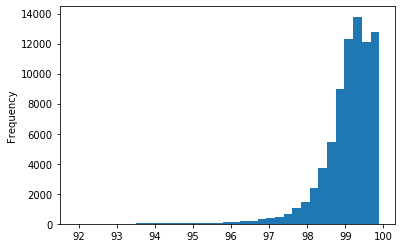

In [27]:
train['app'].plot.hist(bins=35)

In [28]:
#as we can see that most of the values are about 99

In [29]:
train['app'].fillna(value=(train['app'].mean()),inplace=True)

In [30]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,0.010,0.518231,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,0.052,2.410071,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [31]:
test['app'].fillna(value=(test['app'].mean()),inplace=True)

In [32]:
train.isnull().sum()

perc       0
days       0
Income     0
3_6       97
6_12      97
12_       97
app        0
p_p        0
s_c        0
r_a_t      0
target     0
dtype: int64

In [33]:
test.isnull().sum()

id         0
perc       0
days       0
Income     0
3_6       31
6_12      31
12_       31
app        0
p_p        0
s_c        0
r_a_t      0
dtype: int64

In [34]:
#now let's check the remaining values()

In [35]:
train['3_6'].mode()

0    0.0
dtype: float64

In [36]:
train['3_6'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: 3_6, dtype: int64

In [37]:
train['6_12'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: 6_12, dtype: int64

In [38]:
#let's replace the null values with the mod values

In [39]:
test['3_6'].fillna(value=0.0,inplace=True)
test['6_12'].fillna(value=0.0,inplace=True)
test['12_'].fillna(value=0.0,inplace=True)
train['3_6'].fillna(value=0.0,inplace=True)
train['6_12'].fillna(value=0.0,inplace=True)
train['12_'].fillna(value=0.0,inplace=True)

In [40]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,0.010,0.518231,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,0.052,2.410071,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [41]:
#let's normalize the app columns

In [42]:
train['app'] = (train['app']-np.mean(train['app']))/(np.std(train['app']))

In [43]:
test['app'] = (test['app']-np.mean(test['app']))/(np.std(test['app']))

In [44]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,-0.065150,13,C,Urban,1
1,0.010,0.518231,315150,0.0,0.0,0.0,1.133384,21,A,Urban,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,-0.519766,7,C,Rural,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,0.692544,9,A,Urban,1
4,0.052,2.410071,198680,0.0,0.0,0.0,1.105831,12,B,Urban,1


In [45]:
test.head()

,id,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t
0,649,0.001,1.631539,51150,0.0,0.0,0.0,1.136833e+00,7,A,Rural
1,81136,0.124,0.936021,285140,0.0,0.0,0.0,-1.810720e-01,19,A,Urban
2,70762,1.000,-0.315302,186030,0.0,0.0,0.0,-4.252942e-12,2,B,Urban
3,53935,0.198,-0.525349,123540,0.0,0.0,0.0,-8.497481e-02,11,B,Rural
4,15476,0.041,-1.569293,200020,1.0,0.0,0.0,1.484041e-01,14,A,Rural


In [46]:
#DISTRIBUTIONS OF VARIOUS Columns

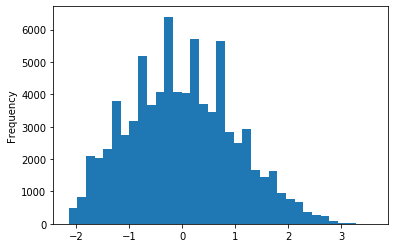

In [47]:
train['days'].plot.hist(bins=35)

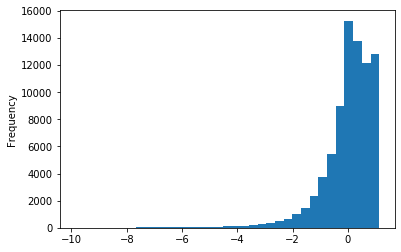

In [48]:
train['app'].plot.hist(bins=35)

In [49]:
#as we can see there are some outliers in the distribution

In [50]:
train[train['app']<-2]['target'].value_counts()

1    2635
0     365
Name: target, dtype: int64

In [51]:
train[train['app']>-2]['target'].value_counts()

1    72220
0     4633
Name: target, dtype: int64

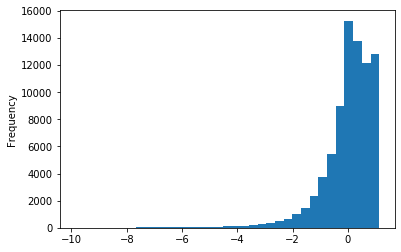

In [52]:
train['app'].plot.hist(bins=35)

In [53]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,-0.065150,13,C,Urban,1
1,0.010,0.518231,315150,0.0,0.0,0.0,1.133384,21,A,Urban,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,-0.519766,7,C,Rural,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,0.692544,9,A,Urban,1
4,0.052,2.410071,198680,0.0,0.0,0.0,1.105831,12,B,Urban,1


In [54]:
# let's create the mapping for columns s_c and r_a_t

In [55]:
train['s_c'].value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: s_c, dtype: int64

In [56]:
train['s_c'] = train['s_c'].map({'A':0,'B':1,'C':2,'D':3,'E':4})

In [57]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,-0.065150,13,2,Urban,1
1,0.010,0.518231,315150,0.0,0.0,0.0,1.133384,21,0,Urban,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,-0.519766,7,2,Rural,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,0.692544,9,0,Urban,1
4,0.052,2.410071,198680,0.0,0.0,0.0,1.105831,12,1,Urban,1


In [58]:
test['s_c'] = test['s_c'].map({'A':0,'B':1,'C':2,'D':3,'E':4})

In [59]:
test['s_c'].value_counts()

0    18672
1     6923
2     5146
3     3222
4      261
Name: s_c, dtype: int64

In [60]:
train['r_a_t'].value_counts()

Urban    48183
Rural    31670
Name: r_a_t, dtype: int64

In [61]:
train['r_a_t'] = train['r_a_t'].map({'Urban':0,'Rural':1})
test['r_a_t'] = test['r_a_t'].map({'Urban':0,'Rural':1})

In [62]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target
0,0.429,-1.303341,355060,0.0,0.0,0.0,-0.065150,13,2,0,1
1,0.010,0.518231,315150,0.0,0.0,0.0,1.133384,21,0,0,1
2,0.917,-0.252597,84140,2.0,3.0,1.0,-0.519766,7,2,1,0
3,0.049,-0.673048,250510,0.0,0.0,0.0,0.692544,9,0,0,1
4,0.052,2.410071,198680,0.0,0.0,0.0,1.105831,12,1,0,1


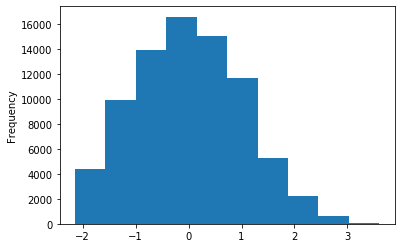

In [63]:
train['days'].plot.hist()

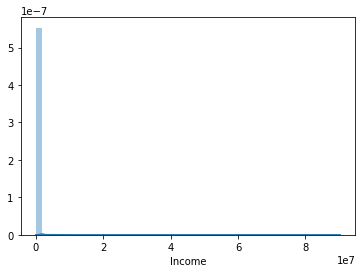

In [64]:
sns.distplot(train['Income'])

In [65]:
train['Income'].mean()

208847.17117703782

In [66]:
train['Income'].isnull().sum()

0

In [67]:
#let's change the income columns

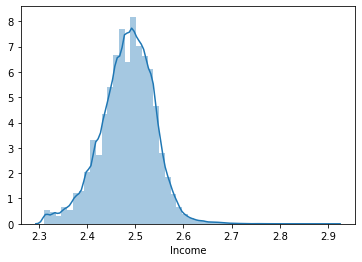

In [69]:
sns.distplot(np.log(np.log(train['Income'])))

In [70]:
train['Income'] = np.log(train['Income'])
test['Income'] = np.log(test['Income'])

In [71]:
X = train.drop('target',axis=1)
y = train['target']

In [73]:
#Let's divide the data in train and test 

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predict = rfc.predict(X_test)

C:\Users\DAY17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
from sklearn.metrics import accuracy_score,classification_report

In [78]:
print(accuracy_score(predict,y_test))

0.9335804448006412


In [79]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.20      0.43      0.27       576
           1       0.98      0.95      0.97     19388

    accuracy                           0.93     19964
   macro avg       0.59      0.69      0.62     19964
weighted avg       0.96      0.93      0.95     19964



In [80]:
rfc.feature_importances_

array([0.16147642, 0.17484288, 0.18102767, 0.04915895, 0.07318106,
       0.04375726, 0.15198079, 0.0994902 , 0.04467296, 0.02041181])

In [82]:
list(zip(X.columns,rfc.feature_importances_))

[('perc', 0.16147642446103522),
 ('days', 0.174842884649824),
 ('Income', 0.18102766743725912),
 ('3_6', 0.049158951315421834),
 ('6_12', 0.07318106426743966),
 ('12_', 0.04375725620504707),
 ('app', 0.15198078779594387),
 ('p_p', 0.09949019940345069),
 ('s_c', 0.044672957069838856),
 ('r_a_t', 0.020411807394739755)]

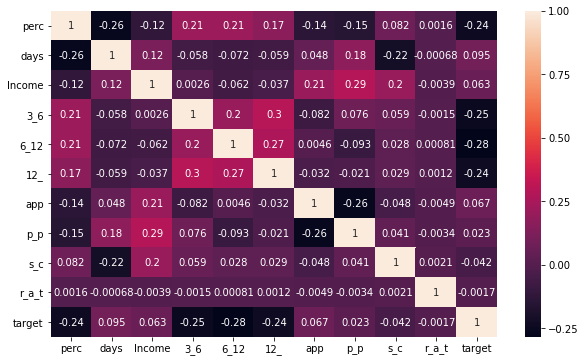

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

In [118]:
rfc = RandomForestClassifier(n_estimators=130)
rfc.fit(X,y)
predict = rfc.predict_proba(test.drop('id',axis=1))

In [119]:
pred = predict[:,1]

In [140]:
pred1 = pred>0.94

In [141]:
ans = pd.DataFrame(test['id'])

In [142]:
ans['target'] = pred1

In [143]:
ans.to_csv('ans.csv',index=False)

In [144]:
ans['target'].value_counts()

True     24230
False     9994
Name: target, dtype: int64

In [145]:
train.loc[train['3_6']>1.5, '3_6'] = np.mean(train['3_6'])

In [149]:
train.loc[train['6_12']>5, '6_9'] = np.mean(train['6_12'])
train.loc[train['12_']>4, '12_'] = np.mean(train['12_'])
test.loc[test['3_6']>1.5, '3_6'] = np.mean(test['3_6'])
test.loc[train['6_12']>5, '6_9'] = np.mean(test['6_12'])
test.loc[train['12_']>4, '12_'] = np.mean(test['12_'])

In [150]:
train.loc[train['app']<-2, 'app'] = np.max(train['app'])

In [152]:
test.loc[test['app']<-2, 'app'] = np.max(test['app'])

In [153]:
X = train.drop('target',axis=1)
y = train['target']

In [156]:
train.head()

,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,target,6_9
0,0.429,-1.303341,12.780042,0.000000,0.0,0.0,-0.065150,13,2,0,1,NaN
1,0.010,0.518231,12.660804,0.000000,0.0,0.0,1.133384,21,0,0,1,NaN
2,0.917,-0.252597,11.340237,0.248369,3.0,1.0,-0.519766,7,2,1,0,NaN
3,0.049,-0.673048,12.431254,0.000000,0.0,0.0,0.692544,9,0,0,1,NaN
4,0.052,2.410071,12.199451,0.000000,0.0,0.0,1.105831,12,1,0,1,NaN


In [157]:
train.drop('6_9',axis=1,inplace=True)

In [158]:
test.head()

,id,perc,days,Income,3_6,6_12,12_,app,p_p,s_c,r_a_t,6_9
0,649,0.001,1.631539,10.842518,0.0,0.0,0.0,1.136833e+00,7,0,1,NaN
1,81136,0.124,0.936021,12.560736,0.0,0.0,0.0,-1.810720e-01,19,0,0,NaN
2,70762,1.000,-0.315302,12.133663,0.0,0.0,0.0,-4.252942e-12,2,1,0,NaN
3,53935,0.198,-0.525349,11.724320,0.0,0.0,0.0,-8.497481e-02,11,1,1,NaN
4,15476,0.041,-1.569293,12.206173,1.0,0.0,0.0,1.484041e-01,14,0,1,NaN


In [159]:
test.drop('6_9',axis=1,inplace=True)

In [160]:
X = train.drop('target',axis=1)
y = train['target']

In [167]:
rfc = RandomForestClassifier(n_estimators=70)
rfc.fit(X,y)
predict = rfc.predict_proba(test.drop('id',axis=1))

In [168]:
pred = predict[:,1]

In [189]:
pred1 = pred>0.93

In [190]:
ans = pd.DataFrame(test['id'])

In [191]:
ans['target'] = pred1
ans.to_csv('ans.csv',index=False)

In [192]:
ans['target'].value_counts()

True     24917
False     9307
Name: target, dtype: int64